## Comp Plot

- Scale 3 sample cryptos to the same scale so that they can be visualized together
- Combine with NASDAQ data via Yahoo Fincance api (yfinance)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf  

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
nasdaq = yf.download('NDAQ','2011-01-01','2023-10-23')

[*********************100%%**********************]  1 of 1 completed


In [17]:
# Plot the close prices
nasdaq = nasdaq[["Adj Close"]]

nasdaq = nasdaq.rename(columns={"Adj Close":"nasdaq"})


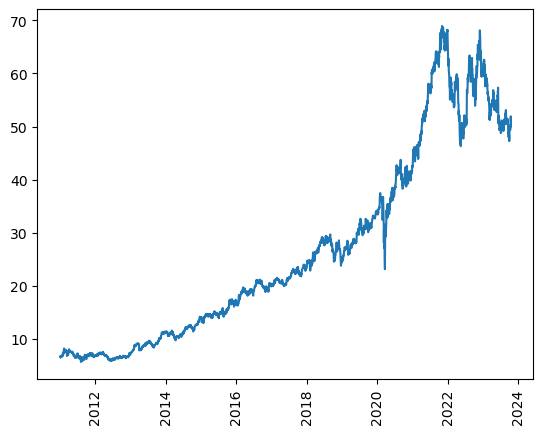

In [18]:
plt.plot(nasdaq)
plt.xticks(rotation=90)
plt.show()

In [19]:
btc_df = pd.read_csv('output/btc_lifetime.csv')

# #rename columns
btc_df = btc_df.rename(columns={"Close":"btc"})

# #convert date to dt, refomat to yyyymmdd
btc_df['Date'] = pd.to_datetime(btc_df['Date']).dt.date


# #set date as index
btc_df.set_index('Date', inplace=True)

btc_df.head()

,btc
Date,
2011-09-13,5.97
2011-09-14,5.53
2011-09-15,5.13
2011-09-16,4.85
2011-09-17,4.87


In [20]:
eth_df = pd.read_csv('output/eth_lifetime.csv')

# #rename columns
eth_df = eth_df.rename(columns={"Close":"eth"})

# #convert date to dt, refomat to yyyymmdd
eth_df['Date'] = pd.to_datetime(eth_df['Date']).dt.date


# # #set date as index
eth_df.set_index('Date', inplace=True)

eth_df.head()

,eth
Date,
2017-08-20,298.40
2017-08-21,319.31
2017-08-22,312.22
2017-08-23,315.61
2017-08-24,323.84


In [21]:
ltc_df = pd.read_csv('output/ltc_lifetime.csv')

# #rename columns
ltc_df = ltc_df.rename(columns={"Close":"ltc"})

# #convert date to dt, refomat to yyyymmdd
ltc_df['Date'] = pd.to_datetime(ltc_df['Date']).dt.date


# # #set date as index
ltc_df.set_index('Date', inplace=True)

ltc_df.head()

,ltc
Date,
2017-06-28,42.04
2017-06-29,40.50
2017-06-30,39.88
2017-07-01,38.10
2017-07-02,41.42


In [22]:
df = pd.merge(nasdaq, btc_df,how='outer', left_index=True, right_index=True)
df_2 = pd.merge(df,eth_df, how='outer', left_index=True, right_index=True)
combined_df = pd.merge(df_2,ltc_df, how='outer', left_index=True, right_index=True)

combined_df =combined_df.dropna()
combined_df.head()

,nasdaq,btc,eth,ltc
Date,,,,
2017-08-21,22.648441,3987.52,319.31,47.66
2017-08-22,22.994379,4085.00,312.22,46.29
2017-08-23,22.768766,4108.12,315.61,52.89
2017-08-24,22.543152,4300.34,323.84,49.83
2017-08-25,22.786814,4355.98,329.00,50.95


In [23]:
scaler = StandardScaler(with_std=True)
scaler.fit(combined_df)

scaled= scaler.transform(combined_df)

min_max_scaler = MinMaxScaler()  # Default range is [0, 1], so this is optional.
min_max_scaled_data = min_max_scaler.fit_transform(scaled)

scaled_df = pd.DataFrame(min_max_scaled_data, columns=("nasdaq","btc", "eth", "ltc"), index=combined_df.index)

scaled_df.head()

,nasdaq,btc,eth,ltc
Date,,,,
2017-08-21,0.018818,0.012302,0.049993,0.069919
2017-08-22,0.026149,0.013816,0.048493,0.066062
2017-08-23,0.021368,0.014175,0.049210,0.084640
2017-08-24,0.016587,0.017162,0.050951,0.076027
2017-08-25,0.021751,0.018026,0.052042,0.079179


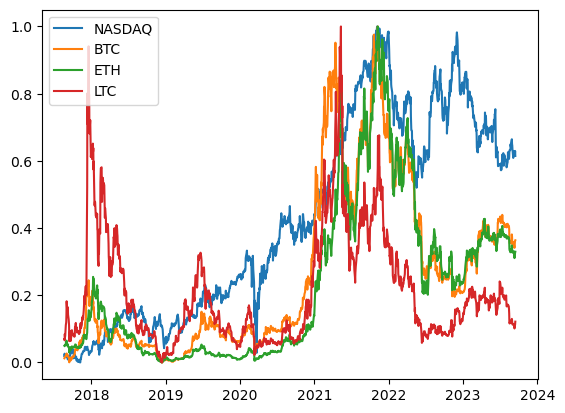

In [24]:
plt.plot(scaled_df)



plt.legend(['NASDAQ','BTC', 'ETH','LTC'])
plt.show()

In [25]:
scaled_df.to_csv('output/scaled_comparison.csv') 

In [26]:
combined_df.head()

,nasdaq,btc,eth,ltc
Date,,,,
2017-08-21,22.648441,3987.52,319.31,47.66
2017-08-22,22.994379,4085.00,312.22,46.29
2017-08-23,22.768766,4108.12,315.61,52.89
2017-08-24,22.543152,4300.34,323.84,49.83
2017-08-25,22.786814,4355.98,329.00,50.95


In [27]:
# log_df = np.diff(np.log(combined_df))

# log_df.head()

In [28]:
scaled_df.to_csv('output/log_comparison.csv') 